# Business Task

The business task is to collect data on available jobs in the tech industry to identify trends in the required skill sets, including programming languages such as C, C#, C++, Java, JavaScript, Python, Scala, Oracle, and SQL Server. Specifically, we are interested in checking the availability of these jobs in the cities of Los Angeles, New York, San Francisco, Washington DC, Seattle, Austin, and Detroit. In addition, we aim to determine the average salary for each of these programming languages.

The possible utilities of this task could include:

- Identifying high-demand programming languages: By analyzing the data collected, we can identify the programming languages that are in high demand in the tech job market. This information can be used to guide job seekers or to inform educational institutions about what programming languages they should focus on teaching.

- Locating job hotspots: By analyzing the data, we can identify locations that have a high concentration of tech jobs. This information can be useful for job seekers who are open to relocating, as well as for businesses looking to expand into new locations.

- Salary comparisons: By comparing the salaries for each programming language, we can identify which programming languages command higher salaries. This information can be useful for job seekers who want to maximize their earning potential or for businesses looking to attract top talent.

NOTE:
Limitations of the data: The data collected may not be comprehensive, as it may not include all available jobs in tech. Additionally, the data may be biased towards certain job boards or employers.


# Description of Data Source
The dataset used comes from the following source: https://www.kaggle.com/promptcloud/jobs-on-naukricom under the under a Public Domain license. Specifically, we use a modified subset of that dataset, rather than the dataset from the original source. The dataset includes information for jobs in tecnology, a total of  observations 17,371, such as:
- Job Title
- Job Experience Required
- Key Skills
- Role Category
- Location
- Functional Area
- Industry
- Role

Additionally, we scrape data from "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html" to collect data on Programming Languages and annual average salary. The dataset includes, a total of 5 observations, with information such as:
- Language (Programming Language)
- Created By (Creator)
- Average Annual Salary
- Learning Difficulty

# Collecting Data 

### JOBS API implementation using FLASK

In [1]:
# The client application, Collecting Jobs API, will access this code on the server, which you will execute.
!pip install flask

The original dataset is a csv. We have converted the csv to json

In [2]:
!wget  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json


--2023-03-24 18:03:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12878382 (12M) [application/json]
Saving to: ‘jobs.json’

jobs.json           100%[===================>]  12.28M  24.1MB/s    in 0.5s    

2023-03-24 18:03:09 (24.1 MB/s) - ‘jobs.json’ saved [12878382/12878382]



In [3]:
# The provided code runs an infinite loop because the last line, app.run(), starts the Flask application and keeps it running until it is manually stopped. 
# To stop the running code in the Kaggle notebook, you can click on the "Interrupt" button located on the top right corner of the notebook. 
# The flask code required to run the Jobs API data.
import flask
from flask import request, jsonify
import requests
import re

def get_data(key,value,current):
    results = list()
    pattern_dict = {
        'C'      : '(C)',
        'C++'    : '(C\+\+)',
        'Java'   :'(Java)',
        'C#'     : '(C\#)',
        'Python' :'(Python)',
        'Scala' : '(Scala)',
        'Oracle' : '(Oracle)',
        'SQL Server': '(SQL Server)',
        'MySQL Server' :'(MySQL Server)',
        'PostgreSQL':'(PostgreSQL)',
        'MongoDB'    : '(MongoDB)',
        'JavaScript'    : '(JavaScript)',
        'Los Angeles' :'(Los Angeles)',
        'New York':'(New York)',
        'San Francisco':'(San Francisco)',
        'Washington DC':'(Washington DC)',
        'Seattle':'(Seattle)',
        'Austin':'(Austin)',
        'Detroit':'(Detroit)',
    }
    for rec in current:
        print(rec[key])
        print(type(rec[key]))
        print(rec[key].find(value))
        #if rec[key].find(value) != -1:
        import re
        #reex_str = """(C)|(C\+\+)|(JavaScript)|(Java)|(C\#)|(Python)|(Scala)|(Oracle)|(SQL Server)|(MySQL Server)|(PostgreSQL)|(MongoDB)"""
        if re.search(pattern_dict[value],rec[key]) != None:
            results.append(rec)
    return results

app = flask.Flask(__name__)

import json
data = None
with open('jobs.json',encoding='utf-8') as f:
    # returns JSON object as
    # a dictionary
    data = json.load(f)

@app.route('/', methods=['GET'])
def home():
    return '''<h1>Welcome to flask JOB search API</p>'''

@app.route('/data/all', methods=['GET'])
def api_all():
    return jsonify(data)

@app.route('/data', methods=['GET'])
def api_id():
    # Check if keys such as Job Title, KeySkills, Role Category and others  are provided as part of the URL.
    # Assign the keys to the corresponding variables..
    # If no key is provided, display an error in the browser.
    res = None
    for req in request.args:
        if req == 'Job Title':
            key = 'Job Title'
        elif req == 'Job Experience Required' :
            key='Job Experience Required'
        elif req == 'Key Skills' :
            key='Key Skills'
        elif req == 'Role Category' :
            key='Role Category'
        elif req == 'Location' :
            key='Location'
        elif req == 'Functional Area' :
            key='Functional Area'
        elif req == 'Industry' :
            key='Industry'
        elif req == 'Role' :
            key='Role'
        elif req=="id":
            key="id"
        else:
            pass
        value = request.args[key]
        if (res==None):
            res = get_data(key,value,data)
        else:
            res = get_data(key,value,res)

    # Use the jsonify function from Flask


### Collecting Job Data Using API
We Collect the number of job postings for the following locations and techologies (Programmming Languages using the API:

Los Angeles
New York
San Francisco
Washington DC
Seattle
Austin
Detroit

In [4]:
#Import required libraries
import pandas as pd
import json

In [5]:
# This url gives use the data
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json" 


In [6]:
response = requests.get(URL) # Call the API using the get method and store the
                                # output of the API call in a variable called response.

In [7]:
# Data Store at the API
if response.ok:             
    data = response.json()
data    

[{'Id': 0,
  'Job Title': 'Digital Media Planner',
  'Job Experience Required': '5 - 10 yrs',
  'Key Skills': 'Media Planning| Digital Media',
  'Role Category': 'Advertising',
  'Location': 'Los Angeles',
  'Functional Area': 'Marketing , Advertising , MR , PR , Media Planning',
  'Industry': 'Advertising, PR, MR, Event Management',
  'Role': 'Media Planning Executive/Manager'},
 {'Id': 1,
  'Job Title': 'Online Bidding Executive',
  'Job Experience Required': '2 - 5 yrs',
  'Key Skills': 'pre sales| closing| software knowledge| clients| requirements| negotiating| client| online bidding| good communication| technology',
  'Role Category': 'Retail Sales',
  'Location': 'New York',
  'Functional Area': 'Sales , Retail , Business Development',
  'Industry': 'IT-Software, Software Services',
  'Role': 'Sales Executive/Officer'},
 {'Id': 2,
  'Job Title': 'Trainee Research/ Research Executive- Hi- Tech Operations',
  'Job Experience Required': '0 - 1 yrs',
  'Key Skills': 'Computer science

#### Note: keys in the json are
- Job Title
- Job Experience Required
- Key Skills
- Role Category
- Location
- Functional Area
- Industry
- Role

In [8]:
# Function to retrieve number of jobs by programming language included in Skill Set of job post
techs = ['C','C#','C++','Java','JavaScript','Python','Scala','Oracle','SQL Server','MySQL Server','PostgreSQL','MongoDB']

def get_number_of_jobs_tech_list():
    jobs = {}
    response = requests.get(URL)
    response.raise_for_status()
    for d in response.json():
        key_skills = d['Key Skills']
        for skill in key_skills.split('|'):
            for tech in techs:
                if tech.lower() in skill.lower():
                    jobs[tech] = jobs.get(tech, 0) + 1
    return jobs


jobs = get_number_of_jobs_tech_list()

for tech in techs:
    print(f'Number of jobs in {tech} = {jobs.get(tech, 0)}')

Number of jobs in C = 96864
Number of jobs in C# = 590
Number of jobs in C++ = 517
Number of jobs in Java = 4110
Number of jobs in JavaScript = 2262
Number of jobs in Python = 1202
Number of jobs in Scala = 139
Number of jobs in Oracle = 1088
Number of jobs in SQL Server = 456
Number of jobs in MySQL Server = 0
Number of jobs in PostgreSQL = 86
Number of jobs in MongoDB = 208


#### Highlights


In [9]:
# Calling the function for Jobs that include Python in Skill Set
print(f"Number of jobs in Python = {jobs.get('Python', 0)}")

Number of jobs in Python = 1202


In [10]:
# Function to get the number of jobs by City included in "Location" of job post
locations = ['Los Angeles', 'New York', 'San Francisco', 'Washington DC', 'Seattle', 'Austin', 'Detroit']

def get_number_of_jobs_Loc_list():
    jobs1 = {}
    response = requests.get(URL)
    response.raise_for_status()
    for d in response.json():
        location = d['Location']
        jobs1[location] = jobs1.get(location, 0) + 1
    return jobs1

jobs1 = get_number_of_jobs_Loc_list()

for location in locations:
    print(f'Number of jobs in {location} = {jobs1.get(location, 0)}')


Number of jobs in Los Angeles = 640
Number of jobs in New York = 3226
Number of jobs in San Francisco = 435
Number of jobs in Washington DC = 5316
Number of jobs in Seattle = 3375
Number of jobs in Austin = 434
Number of jobs in Detroit = 3945


In [11]:
# Calling the function for Jobs in Los Angeles
print(f"Number of jobs in Los Angeles = {jobs1.get('Los Angeles', 0)}")

Number of jobs in Los Angeles = 640


### Store the results in an excel file

#### Collect the number of job postings for the Location using the API:
- Los Angeles
- New York
- San Francisco
- Washington DC
- Seattle
- Austin
- Detroit

In [12]:
# Create a python list of all locations for which you need to find the number of jobs postings.
loc_list = ['Los Angeles', 'New York', 'San Francisco', 'Washington DC', 'Seattle', 'Austin', 'Detroit']
loc_list


['Los Angeles',
 'New York',
 'San Francisco',
 'Washington DC',
 'Seattle',
 'Austin',
 'Detroit']

In [13]:
# Import libraries required to create excel spreadsheet
!pip install openpyxl

In [14]:
# Create a workbook and select the active worksheet
from openpyxl import Workbook

wb=Workbook()                       
ws=wb.active 
ws.append(['Location', 'Number of Jobs'])

In [15]:
#Find the number of jobs postings for each of the location in the above list. Write the Location name and the number of jobs postings into the excel spreadsheet.

for location in locations:
    jobs = get_number_of_jobs_Loc_list()
    ws.append([location, jobs.get(location, 0)])


In [16]:
# Save into an excel spreadsheet named 'job-postings.xlsx'.
wb.save("github-job-postings.xlsx")
job_data = pd.read_excel("github-job-postings.xlsx")
job_data

,Location,Number of Jobs
0,Los Angeles,640
1,New York,3226
2,San Francisco,435
3,Washington DC,5316
4,Seattle,3375
5,Austin,434
6,Detroit,3945


#### Key Takeaways
- According to the available information, Washington, DC, Seattle, and Detroit are the cities with the most IT job openings.
- While Los Angeles and San Francisco have relatively less positions, 
- New York boasts a sizable amount of tech jobs. 
- Among the cities, Austin has the fewest tech employment openings.

It is crucial to remember that the quantity of open positions does not always correspond to the caliber or level of competition in the local labor market. When examining the job market, additional elements including the cost of living, industry specialization, and the skill pool should also be taken into account.

#### Collect the number of job postings for the following languages using the API:
- C
- C#
- C++
- Java
- JavaScript
- Python
- Scala
- Oracle
- SQL Server
- MySQL Server
- PostgreSQL
- MongoDB

In [17]:
# Create a python list of all technologies for which you need to find the number of jobs postings.
tech_list=['C','C#','C++','Java','JavaScript','Python','Scala','Oracle','SQL Server','MySQL Server','PostgreSQL','MongoDB']
tech_list

['C',
 'C#',
 'C++',
 'Java',
 'JavaScript',
 'Python',
 'Scala',
 'Oracle',
 'SQL Server',
 'MySQL Server',
 'PostgreSQL',
 'MongoDB']

In [18]:
# Create a workbook and select the active worksheet
wb1 = Workbook()                       
ws1 = wb1.active  
ws1.append(['Technology', 'Number of Jobs'])

In [19]:
# Find the number of jobs postings for each of the location in the above list. Write the Location name and the number of jobs postings into the excel spreadsheet.
jobs = get_number_of_jobs_tech_list()
for tech in techs:
    ws1.append([tech, jobs.get(tech, 0)])

In [20]:
# Save into an excel spreadsheet named 'job-postings.xlsx'.
wb1.save("github-job-postings1.xlsx")
job_data1 = pd.read_excel("github-job-postings1.xlsx")
job_data1

,Technology,Number of Jobs
0,C,96864
1,C#,590
2,C++,517
3,Java,4110
4,JavaScript,2262
5,Python,1202
6,Scala,139
7,Oracle,1088
8,SQL Server,456
9,MySQL Server,0


The key takeaways are:

- There are a large number of job postings for C programming language, with 96,864 available jobs. This indicates that C is still a widely used and in-demand programming language in the tech industry.
- Java and JavaScript are also in high demand, with 4,110 and 2,262 available jobs respectively.
- Python has a decent number of job postings, with 1,202 available jobs, indicating its popularity as a programming language.
- Oracle, SQL Server, and PostgreSQL have a moderate number of available jobs, with 1,088, 456, and 86 job postings respectively.
- MongoDB and Scala have fewer job postings, with 208 and 139 job postings respectively, indicating lower demand for these technologies.
- MySQL Server has no available job postings in the specified cities, indicating that it may not be as popular or in-demand in those areas. However, it's worth noting that this data only covers a specific set of cities, and job postings for MySQL Server may exist in other locations.

### Web Scraping Tecnology Jobs Data

In [21]:
#This url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"


In [22]:
# Import the required libraries
!pip install html5lib

In [23]:
# This module helps in web scrapping.
from bs4 import BeautifulSoup 

In [24]:
# This module helps us to download a web page
import requests  

In [25]:
# Get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text 

In [26]:
# Create a soup object
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'

In [27]:
# Scrape the Language name and annual average salary.
import pandas as pd

table = soup.find('table')
df = pd.read_html(str(table), flavor='bs4')[0]
headers = df.iloc[0]
df = pd.DataFrame(df.values[1:], columns=headers)
df.head()

,No.,Language,Created By,Average Annual Salary,Learning Difficulty
0,1,Python,Guido van Rossum,"$114,383",Easy
1,2,Java,James Gosling,"$101,013",Easy
2,3,R,"Robert Gentleman, Ross Ihaka","$92,037",Hard
3,4,Javascript,Netscape,"$110,981",Easy
4,5,Swift,Apple,"$130,801",Easy


In [28]:
# Save the scrapped data into a file named popular-languages.csv
df.to_csv('popular-Languages.csv')

# Exploring Data through Visuals

## Number of Tech Jobs by City

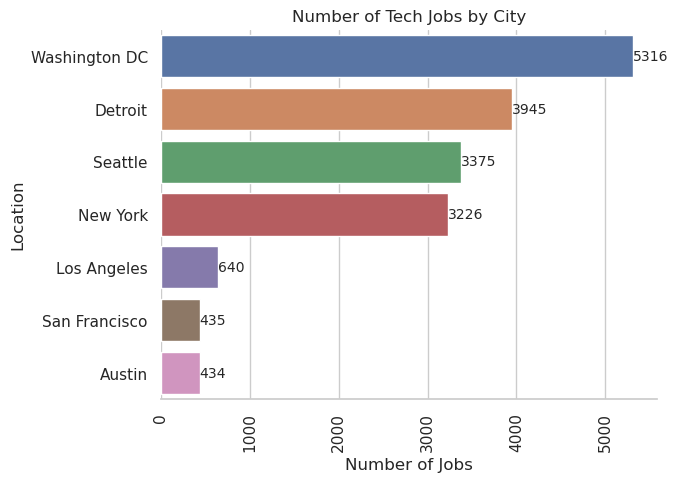

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort job_data in descending order by "Number of Jobs"
job_data = job_data.sort_values("Number of Jobs", ascending=False)

# Create a bar plot using Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x="Number of Jobs", y="Location", data=job_data)
ax.set(title="Number of Tech Jobs by City")
sns.despine(left=True)

# Rotate the x-axis labels horizontally
plt.xticks(rotation=90)

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.show()

## Number of Tech Jobs by Programming Language Require

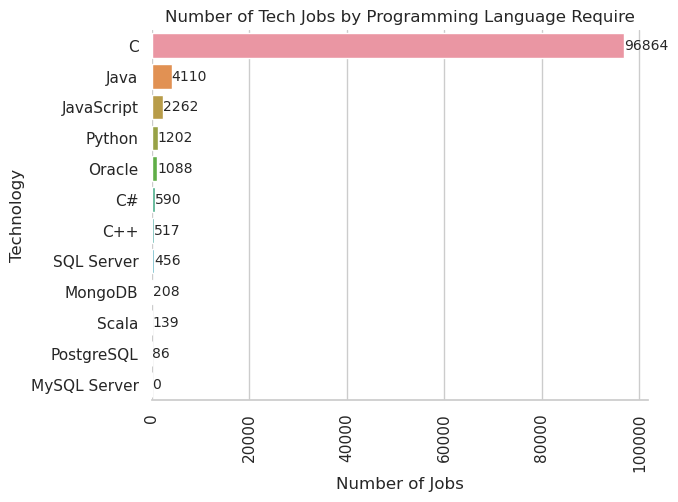

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort job_data1 in descending order by "Number of Jobs"
job_data1 = job_data1.sort_values("Number of Jobs", ascending=False)

# Create a bar plot using Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x="Number of Jobs", y="Technology", data=job_data1)
ax.set(title="Number of Tech Jobs by Programming Language Require")
sns.despine(left=True)

# Rotate the x-axis labels horizontally
plt.xticks(rotation=90)

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.show()

# Conclusion
Based on the data collected on available jobs in different locations and programming languages, we can draw the following conclusions:

- Washington DC has the highest number of available jobs (5316), followed by Detroit (3945), Seattle (3375), New York (3226), Los Angeles (640), San Francisco (435), and Austin (434).

- The most in-demand programming languages are C (96864), followed by Java (4110), JavaScript (2262), Python (1202), SQL Server (456), C++ (517), Oracle (1088), Scala (139), C# (590), PostgreSQL (86), and MongoDB (208). There were no available jobs in the data collected for MySQL Server.

- In terms of average salaries, the highest paying programming languages are Swift ($130,801), followed by C++ ($113,865), Python ($114,383), Go ($94,082), R ($92,037), Javascript ($110,981), C# ($88,726), SQL ($84,793), PHP ($84,727), and Java ($101,013). It's worth noting that the difficulty of the programming language is not directly correlated with its average salary.

Overall, the data suggests that Washington DC has the most available tech jobs, and C is the most in-demand programming language. The average salaries vary greatly between different programming languages, with Swift being the highest-paying language on average.